<a href="https://colab.research.google.com/github/frlps/IE708A_FEEC_UNICAMP_S12021/blob/main/Prova_IE708A_S12021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1 Medidas de Campo (Probability Density Function – PDF, e Cumulative Distribution Function – CDF). 
Em um cenário de desvanecimento, foram feitas medidas de campo com o objetivo de se caracterizar o ambiente em termos de suas estatísticas. Os dados coletados apresentam-se na tabela seguinte:

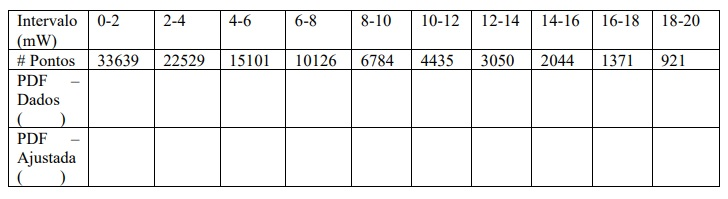

## a. A partir do histograma dos dados, sugira uma PDF dentre aquelas conhecidas para possível ajuste aos dados.

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
IntervaloPot = ['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20']
Intervalo = [0,2,4,6,8,10,12,14,16,18]
IntervaloMedia = [1,3,5,7,9,11,13,15,17,19]
Pontos = [33639,22529,15101,10126,6784,4435,3050,2044,1371,921]

In [20]:
len(IntervaloPot),len(IntervaloMedia), len(Pontos)

(10, 10, 10)

In [21]:
dfQuestao1 = pd.DataFrame(list(zip(Intervalo, IntervaloMedia, Pontos)), columns = ['Intervalo','Media_Intervalo', 'Frequencia'], index=IntervaloPot)
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia
0-2,0,1,33639
2-4,2,3,22529
4-6,4,5,15101
6-8,6,7,10126
8-10,8,9,6784
10-12,10,11,4435
12-14,12,13,3050
14-16,14,15,2044
16-18,16,17,1371
18-20,18,19,921


In [22]:
Pontos_Totais = dfQuestao1.Frequencia.sum()
Pontos_Totais

100000

In [23]:
sns.set()

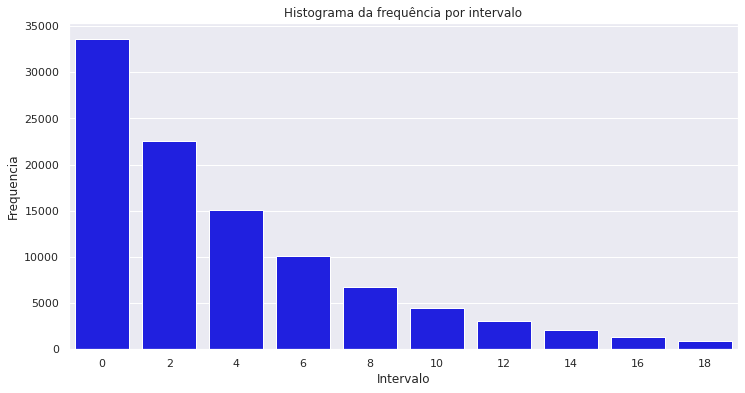

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=dfQuestao1, x='Intervalo', y='Frequencia', color="blue")
plt.title('Histograma da frequência por intervalo')
plt.show()

Pelo histograma acima podemos inferir que a PDF 𝑓W(𝑤) da potência do sinal recebido em um ambiente sem fio pode ser modelada por uma exponencial negativa tal que: 

$$𝑓_W(𝑤) = \lambda e^{-(\lambda w)}$$

$$𝑓_W(𝑤) = \frac {1}{W_m} e^{-(\frac{𝑤}{W_m})}$$ 

Onde $W_m$ é a potência média. 

## b. Ajuste a PDF sugerida aos dados. Uma maneira de fazer isso é determinar os parâmetros da PDF-alvo a partir dos dados. Plote e contraste as PDFs teórica e empírica.

Para tanto devemos calcular a média, que para o caso discreto é $Wm = \frac {1}{10^5} \sum x_i freq_i = E(w)$

Portanto:

In [25]:
Wm = 0
for i in range(0,len(Pontos)):
  # print(Pontos[i],IntervaloMedia[i])
  Wm += Pontos[i]*IntervaloMedia[i]
Wm *= (1/10**5)
Wm = round(Wm,4)
print(f'A pontencia média é {Wm} mW')

A pontencia média é 4.6857 mW


Portanto, a PDF 𝑓W(𝑤) para a distribuição apresentada é:  $$𝑓_W(𝑤) = \frac {1}{4.6857} e^{-(\frac{𝑤}{4.6857})}$$ 

In [26]:
dfQuestao1['PDF_Ajustada'] = (1/Wm)*np.exp(-(dfQuestao1.Media_Intervalo)*(1/Wm))
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada
0-2,0,1,33639,0.172401
2-4,2,3,22529,0.112505
4-6,4,5,15101,0.073418
6-8,6,7,10126,0.047910
8-10,8,9,6784,0.031265
10-12,10,11,4435,0.020403
12-14,12,13,3050,0.013314
14-16,14,15,2044,0.008689
16-18,16,17,1371,0.005670
18-20,18,19,921,0.003700


Para a PDF teórica, temos que: $f_w(w) = \frac{dF_w(w)}{dw}$

Fazendo a derivada: $f_w(w) = \frac{F_w(w+\frac{\Delta w}{2})+F_w(w-\frac{\Delta w}{2})}{\Delta w}$

Portanto: $f_w(w) = \frac{frequência}{intervalo}$

E a frequência: $ \frac{Pontos}{Total de Pontos}$

In [27]:
fw_teorico = []
for i in range(0,len(Pontos)):
  fw_teorico.append((1/2)*(Pontos[i]/Pontos_Totais))

fw_teorico

[0.168195,
 0.112645,
 0.075505,
 0.05063,
 0.03392,
 0.022175,
 0.01525,
 0.01022,
 0.006855,
 0.004605]

In [28]:
dfQuestao1['PDF_Dados'] = fw_teorico
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada,PDF_Dados
0-2,0,1,33639,0.172401,0.168195
2-4,2,3,22529,0.112505,0.112645
4-6,4,5,15101,0.073418,0.075505
6-8,6,7,10126,0.047910,0.050630
8-10,8,9,6784,0.031265,0.033920
10-12,10,11,4435,0.020403,0.022175
12-14,12,13,3050,0.013314,0.015250
14-16,14,15,2044,0.008689,0.010220
16-18,16,17,1371,0.005670,0.006855
18-20,18,19,921,0.003700,0.004605


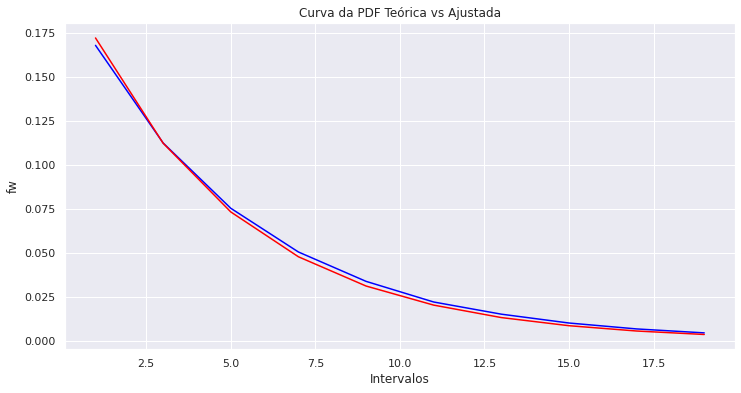

In [29]:
plt.figure(figsize=(12,6))
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Dados'], color='Blue')
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Ajustada'], color='Red')
plt.title('Curva da PDF Teórica vs Ajustada')
plt.ylabel('fw')
plt.xlabel('Intervalos')
plt.show()

## c. Determine o desvio padrão a partir dos dados e a partir da PDF ajustada e compare ambos.

Para a distribuição ajustada:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


$$Variancia = E^2(x)$$ 

Portanto: $$ DesvioPadrao = \sqrt{E(x)^2} = E(x) = Wm $$

In [30]:
desv_Pad_Ajustada = Wm
desv_Pad_Ajustada

4.6857

Para a distribuição a partir dos dados:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


e que: $$ Variancia =  \sigma^2 = E(x^2) - E^2(x)$$


Portanto: $$ DesvioPadrao = \sqrt{E(x^2)-E^2(x)}$$

In [31]:
E_w2 = 0
for i in range(0,len(Pontos)):
  E_w2 += ((IntervaloMedia[i]**2)*(Pontos[i])) 

E_w2=E_w2*(1/10**5)
E_w2 = round(E_w2,6)
E_w2

39.00288

In [32]:
E2_w = Wm**2 
E2_w

21.95578449

In [33]:
Variancia_Dados=E_w2-E2_w
Variancia_Dados

17.04709551

In [34]:
Desvio_Pad_Dados = round(np.sqrt(Variancia_Dados),4)
Desvio_Pad_Dados

4.1288

In [35]:
print(f'O desvio padrão da pdf ajustada é {desv_Pad_Ajustada}, e o desvio padrão a partir dos dados é {Desvio_Pad_Dados}')

O desvio padrão da pdf ajustada é 4.6857, e o desvio padrão a partir dos dados é 4.1288


## d. Preencha as duas últimas linhas da tabela com o valor da PDF em cada ponto a partir dos dados e o valor da PDF em cada ponto a partir do ajuste. Não se esqueça de também preencher o espaço entre parênteses com a unidade correspondente (se houver)

In [36]:
dfQuestao1_d = dfQuestao1.drop(['Intervalo','Media_Intervalo'], axis=1)
dfQuestao1_d.rename(columns={'PDF_Ajustada':'PDF_Ajustada(1/mW)','PDF_Dados':'PDF_Dados(1/mW)'}, inplace=True)
dfQuestao1_d

,Frequencia,PDF_Ajustada(1/mW),PDF_Dados(1/mW)
0-2,33639,0.172401,0.168195
2-4,22529,0.112505,0.112645
4-6,15101,0.073418,0.075505
6-8,10126,0.047910,0.050630
8-10,6784,0.031265,0.033920
10-12,4435,0.020403,0.022175
12-14,3050,0.013314,0.015250
14-16,2044,0.008689,0.010220
16-18,1371,0.005670,0.006855
18-20,921,0.003700,0.004605


## e. Determine a CDF teórica e plote-a contrastando-a com a empírica.

In [38]:
cdf_empirica = []
soma = 0

for i in range (0,10):
  soma += dfQuestao1.PDF_Ajustada[i]*2 # 2 que é o delta w
  cdf_empirica.append(soma)

cdf_empirica

[0.34480252339362166,
 0.5698117227921629,
 0.7166469005503459,
 0.812467735809124,
 0.8749979319778567,
 0.9158035190126659,
 0.9424321886039504,
 0.9598093689296964,
 0.971149266893368,
 0.9785493907003335]

In [39]:
dfQuestao1_CDF = dfQuestao1.drop(['Media_Intervalo','Frequencia'], axis=1)
dfQuestao1_CDF['CDF_Empirica'] = cdf_empirica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica
0-2,0,0.172401,0.168195,0.344803
2-4,2,0.112505,0.112645,0.569812
4-6,4,0.073418,0.075505,0.716647
6-8,6,0.047910,0.050630,0.812468
8-10,8,0.031265,0.033920,0.874998
10-12,10,0.020403,0.022175,0.915804
12-14,12,0.013314,0.015250,0.942432
14-16,14,0.008689,0.010220,0.959809
16-18,16,0.005670,0.006855,0.971149
18-20,18,0.003700,0.004605,0.978549


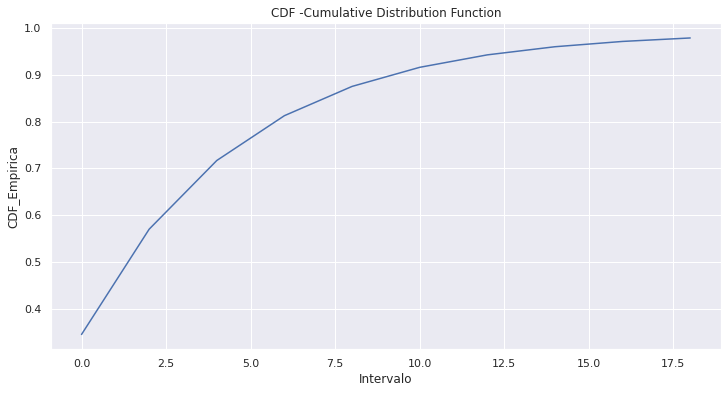

In [40]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica")
plt.title('CDF -Cumulative Distribution Function')
plt.show()

In [41]:
lambda1 = 1/Wm
lambda1

0.21341528480269759

In [42]:
def cdf_teorica_function(media,lambda1):
  fw = 1-np.exp(-(lambda1*media))
  return fw

In [43]:
cdf_teorica = []
for i in IntervaloMedia:
  cdf_teorica.append(cdf_teorica_function(i,lambda1))
cdf_teorica

[0.19217940806725353,
 0.47283719718912776,
 0.6559872037892411,
 0.7755061561139716,
 0.8535011299060847,
 0.9043986304154973,
 0.937613021448059,
 0.959287873073826,
 0.9734323200558118,
 0.982662619938851]

In [44]:
dfQuestao1_CDF['CDF_Teorica'] = cdf_teorica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica,CDF_Teorica
0-2,0,0.172401,0.168195,0.344803,0.192179
2-4,2,0.112505,0.112645,0.569812,0.472837
4-6,4,0.073418,0.075505,0.716647,0.655987
6-8,6,0.047910,0.050630,0.812468,0.775506
8-10,8,0.031265,0.033920,0.874998,0.853501
10-12,10,0.020403,0.022175,0.915804,0.904399
12-14,12,0.013314,0.015250,0.942432,0.937613
14-16,14,0.008689,0.010220,0.959809,0.959288
16-18,16,0.005670,0.006855,0.971149,0.973432
18-20,18,0.003700,0.004605,0.978549,0.982663


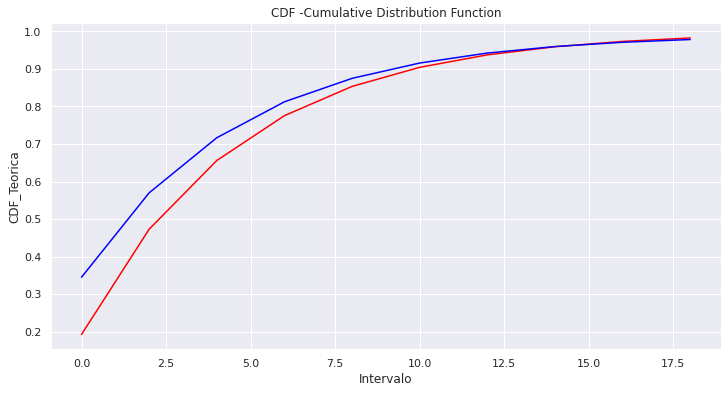

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Teorica",color='red')
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica", color='blue')
plt.title('CDF -Cumulative Distribution Function')
plt.show()

## f. Determine a PDF teórica da envoltória correspondente.